# Chain

## Goals

Now, let's build up to a simple chain that combines 4 [concepts](https://python.langchain.com/v0.2/docs/concepts/):

* Using [chat messages](https://python.langchain.com/v0.2/docs/concepts/#messages) as our graph state
* Using [chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) in graph nodes
* [Binding tools](https://python.langchain.com/v0.2/docs/concepts/#tools) to our chat model
* [Executing tool calls](https://python.langchain.com/v0.2/docs/concepts/#functiontool-calling) in graph nodes 

![Screenshot 2024-08-21 at 9.24.03 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dd607b08df5e1101_chain1.png)

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation. 

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`. 

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call. 

Let's create a list of messages. 

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author 
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [1]:
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint

In [2]:
messages = [AIMessage(content="Hey There I am Good", name="ChatGPT")]
messages.append(HumanMessage(content="FIne Fine ", name="Naga"))

In [3]:
for i in messages:
    i.pretty_print()

================================== Ai Message ==================================
Name: ChatGPT

Hey There I am Good
================================ Human Message =================================
Name: Naga

FIne Fine 


## Chat Models

[Chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) can use a sequence of message as input and support message types, as discussed above.

There are [many](https://python.langchain.com/v0.2/docs/concepts/#chat-models) to choose from! Let's work with OpenAI. 

Let's check that your `OPENAI_API_KEY` is set and, if not, you will be asked to enter it.

In [6]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [7]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="gpt-4o-mini"
)
# response = llm.invoke(messages)

In [ ]:
# response

AIMessage(content='Glad to hear that! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 25, 'total_tokens': 37, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-ab882fd2-f12e-49ea-a5c4-16bf7bc18084-0', usage_metadata={'input_tokens': 25, 'output_tokens': 12, 'total_tokens': 37, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language. 

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user. 

And, it will return an output that adheres to the tool's schema. 

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple. 
 
You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

Let's showcase a simple example of tool calling!
 
The `multiply` function is our tool.

In [8]:
def multiply(a:int, b:int)->int:
    """Multiply a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a * b

In [8]:
llm.invoke("hey how are you")

AIMessage(content="I'm just a program, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 11, 'total_tokens': 32, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-3e52a41d-ce6c-4b73-a22b-df85859f50f8-0', usage_metadata={'input_tokens': 11, 'output_tokens': 21, 'total_tokens': 32, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
llm_with_tools = llm.bind_tools([multiply])

If we pass an input - e.g., `"What is 2 multiplied by 3"` - we see a tool call returned. 

The tool call has specific arguments that match the input schema of our function along with the name of the function to call.

```
{'arguments': '{"a":2,"b":3}', 'name': 'multiply'}
```

In [10]:
llm_with_tools.invoke(
    [
        HumanMessage(content="hey how are you")
    ]
)

AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here and ready to assist you! How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 56, 'total_tokens': 85, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-fae6eb41-8fa1-41d7-92db-8419b5505ab6-0', usage_metadata={'input_tokens': 56, 'output_tokens': 29, 'total_tokens': 85, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
llm_with_tools.invoke(
    [
        HumanMessage(content="can you mulitply 2 * 5")
    ]
)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lfwa0RzUhpZnViliNdYhAHSB', 'function': {'arguments': '{"a":2,"b":5}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 62, 'total_tokens': 79, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7bbc402b-3f98-4e2b-87d6-26ff9fcad035-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 5}, 'id': 'call_lfwa0RzUhpZnViliNdYhAHSB', 'type': 'tool_call'}], usage_metadata={'input_tokens': 62, 'output_tokens': 17, 'total_tokens': 79, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## Using messages as state

With these foundations in place, we can now use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages) in our graph state.

Let's define our state, `MessagesState`, as a `TypedDict` with a single key: `messages`.

`messages` is simply a list of messages, as we defined above (e.g., `HumanMessage`, etc).

In [ ]:
from typing_extensions import TypedDict, Annotated
from langchain_core.messages import AnyMessage

class State(TypedDict):
    messages: list[AnyMessage]

## Reducers

Now, we have a minor problem! 

As we discussed, each node will return a new value for our state key `messages`.

But, this new value will [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior `messages` value.
 
As our graph runs, we want to **append** messages to to our `messages` state key.
 
We can use [reducer functions](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) address this.

Reducers allow us to specify how state updates are performed.

If no reducer function is specified, then it is assumed that updates to the key should *override it* as we saw before.
 
But, to append messages, we can use the pre-built `add_messages` reducer.

This ensures that any messages are appended to the existing list of messages.

We annotate simply need to annotate our `messages` key with the `add_messages` reducer function as metadata.

In [ ]:
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

Since having a list of messages in graph state is so common, LangGraph has a pre-built [`MessagesState`](https://langchain-ai.github.io/langgraph/concepts/low_level/#messagesstate)! 

`MessagesState` is defined: 

* With a pre-build single `messages` key
* This is a list of `AnyMessage` objects 
* It uses the `add_messages` reducer

We'll usually use `MessagesState` because it is less verbose than defining a custom `TypedDict`, as shown above.

In [10]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

To go a bit deeper, we can see how the `add_messages` reducer works in isolation.

In [19]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test


In [22]:
from langgraph.graph.message import add_messages

add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='fc97d09c-bb7a-478f-bc32-6517d16d2a9b'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='513a6425-5c41-47a1-b801-4fc7b8964394'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='bc5d2dae-378a-4e92-b0e5-161309b8e4aa')]

## Our graph

Now, lets use `MessagesState` with a graph.

In [11]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [12]:
## Node

def tool_calling_with_llm(state:MessagesState):
    return {"messages": llm_with_tools.invoke(state["messages"])}

In [17]:
## Build Graph

builder = StateGraph(MessagesState)

In [18]:
builder.add_node("LLM_WITH_TOOLS", tool_calling_with_llm)

In [19]:
builder.add_edge(START, "LLM_WITH_TOOLS")
builder.add_edge("LLM_WITH_TOOLS", END)

In [20]:
graph = builder.compile()

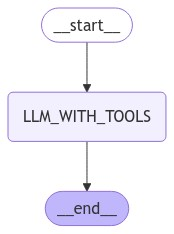

In [21]:
display(Image(graph.get_graph().draw_mermaid_png()))

If we pass in `Hey I am Robot.`, the LLM responds without any tool calls.

In [22]:
graph.invoke({"messages":"Hey I am Robot."})

{'messages': [HumanMessage(content='Hey I am Robot.', additional_kwargs={}, response_metadata={}, id='4037a748-663a-42ca-bf58-7e35996018e7'),
  AIMessage(content='Hello, Robot! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 57, 'total_tokens': 69, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_818c284075', 'finish_reason': 'stop', 'logprobs': None}, id='run-c92f33f4-b5f7-4204-aa83-c788569a8202-0', usage_metadata={'input_tokens': 57, 'output_tokens': 12, 'total_tokens': 69, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [23]:
graph.invoke({"messages":"can u tell me about the marvel movies."})

{'messages': [HumanMessage(content='can u tell me about the marvel movies.', additional_kwargs={}, response_metadata={}, id='7e7fba2c-cfc6-43c9-a7d8-d95b231a0b00'),
  AIMessage(content="Sure! The Marvel Cinematic Universe (MCU) is a media franchise and shared universe centered around a series of superhero films and television series produced by Marvel Studios. The franchise is based on characters that appear in American comic books published by Marvel Comics. Here's a brief overview of the major phases and notable films:\n\n### Phase One (2008-2012)\n1. **Iron Man (2008)** - The film that kicked off the MCU, introducing Tony Stark, who becomes Iron Man.\n2. **The Incredible Hulk (2008)** - Follows Bruce Banner as he becomes the Hulk.\n3. **Iron Man 2 (2010)** - Tony Stark deals with his identity as Iron Man and faces new threats.\n4. **Thor (2011)** - Introduces the Norse god Thor and his banishment to Earth.\n5. **Captain America: The First Avenger (2011)** - Tells the origin story of

In [24]:
graph.invoke({"messages":"can u multiply 5 and 6."})

{'messages': [HumanMessage(content='can u multiply 5 and 6.', additional_kwargs={}, response_metadata={}, id='d1afa489-d660-48b3-8528-0b9c1e7a2564'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rdQYnb4O0LsIDPOl9k4Vbphe', 'function': {'arguments': '{"a":5,"b":6}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 61, 'total_tokens': 78, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6a53626f-2f6e-44da-b693-ba458a91e75f-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5, 'b': 6}, 'id': 'call_rdQYnb4O0LsIDPOl9k4Vbphe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 61, 'outpu